In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.stats.multicomp 
import seaborn as sns
from sklearn import linear_model
import statsmodels.api as sa
import statsmodels.formula.api as smf
import pingouin as pg
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [78]:
df=pd.DataFrame({
    "f1":np.repeat(["A","B","C"],20),
    "f2":np.tile(np.repeat(["A","B"],10),3),
    "rta":np.concatenate((np.random.normal(15,0.3,20),
                          np.random.normal(25,0.8,20),
                          np.random.normal(20,1.2,20)))
})
df.head(5)

,f1,f2,rta
0,A,A,15.132727
1,A,A,14.898254
2,A,A,15.034917
3,A,A,14.887151
4,A,A,14.496597


In [79]:
df.groupby(["f1","f2"])["rta"].agg(['mean', "median",'std']).round(2)

mean  median   std
f1 f2                     
A  A   14.92   14.89  0.32
   B   14.94   14.92  0.33
B  A   24.79   24.88  0.50
   B   25.53   25.53  0.54
C  A   19.98   19.94  0.53
   B   19.90   20.05  0.89

Text(0.5, 1.0, 'respuesta evaluada en las combinaciones de f1 y f2')

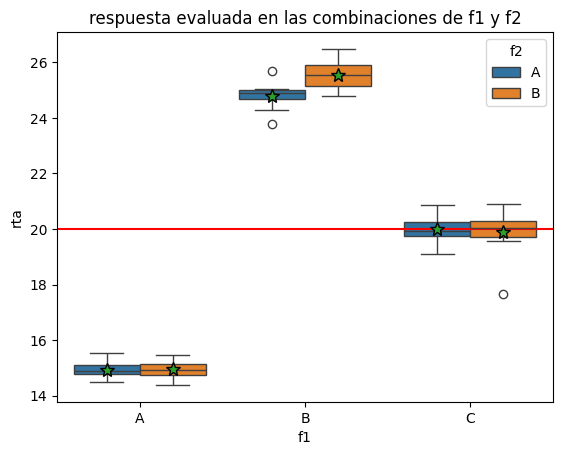

In [80]:
graf=sns.boxplot(x="f1",y="rta",data=df,hue="f2",showmeans=True,
            meanprops={"marker": "*",
                       "markeredgecolor": "black",
                       "markersize": "10"})
graf.axhline(df["rta"].mean(),color="red")
plt.title("respuesta evaluada en las combinaciones de f1 y f2")

In [81]:
medias=pd.DataFrame(df.groupby(["f1","f2"])["rta"].agg("mean"))
medias



rta
f1 f2           
A  A   14.923649
   B   14.940667
B  A   24.791802
   B   25.532339
C  A   19.983756
   B   19.898696

Text(0.5, 1.0, 'interaccion entre f1 y f2 para la variable rta')

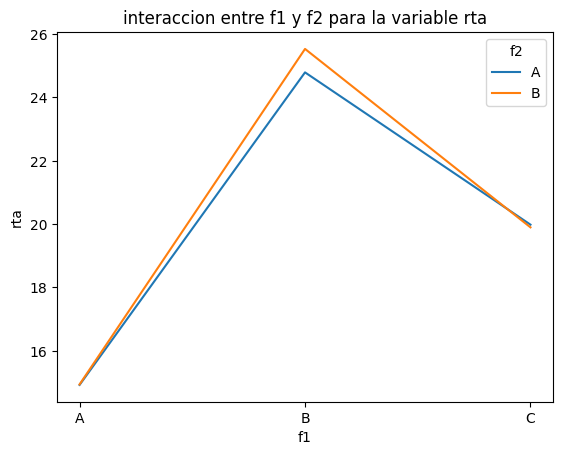

In [82]:
sns.lineplot(x="f1",y="rta",data=medias,hue="f2")
plt.title("interaccion entre f1 y f2 para la variable rta")



In [83]:
mod=smf.ols('rta ~ f1*f2', data = df).fit()
anova=sa.stats.anova_lm(mod)
print(anova)

            df       sum_sq     mean_sq            F        PR(>F)
f1         2.0  1046.660593  523.330296  1720.402155  1.265360e-49
f2         1.0     0.753750    0.753750     2.477885  1.212987e-01
f1:f2      2.0     2.025847    1.012924     3.329897  4.328190e-02
Residual  54.0    16.426297    0.304191          NaN           NaN


In [84]:
# Supuestos
predichos = mod.predict()
predichos
residuos = df["rta"] - predichos

# normalidad
stats.shapiro(residuos)

ShapiroResult(statistic=0.9280620570535925, pvalue=0.0016450190939078884)

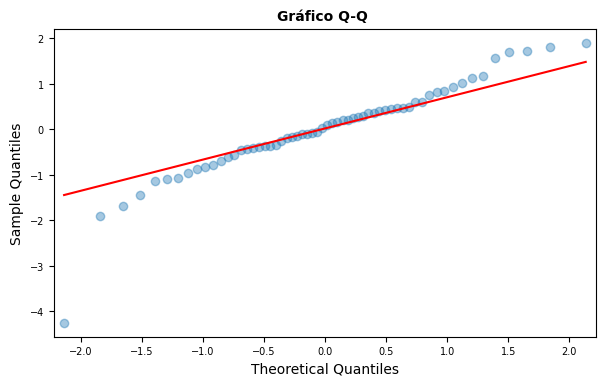

In [85]:
# qq plot
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    residuos,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q ', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)